Shape of dataset: (252, 16)

Columns: ['Product_ID', 'Product_Position', 'Promotion', 'Product_Category', 'Seasonal', 'Sales_Volume', 'brand', 'url', 'sku', 'name', 'description', 'price', 'currency', 'scraped_at', 'terms', 'section']

Missing values:
 Product_ID          0
Product_Position    0
Promotion           0
Product_Category    0
Seasonal            0
Sales_Volume        0
brand               0
url                 0
sku                 0
name                1
description         2
price               0
currency            0
scraped_at          0
terms               0
section             0
dtype: int64

📊 Key Metrics:
Total Revenue: $38,988,476.48
Total Sales Volume: 459573
Average Price: $86.25

🏆 Top 5 Products by Revenue:
name
CONTRASTING PATCHES BOMBER JACKET    889308.0
SUIT JACKET IN 100% LINEN            816675.0
FAUX LEATHER BOMBER JACKET           798852.6
PLAID OVERSHIRT                      695369.0
RIB COLLAR JACKET                    685883.0
Name: Revenue, dtype: 

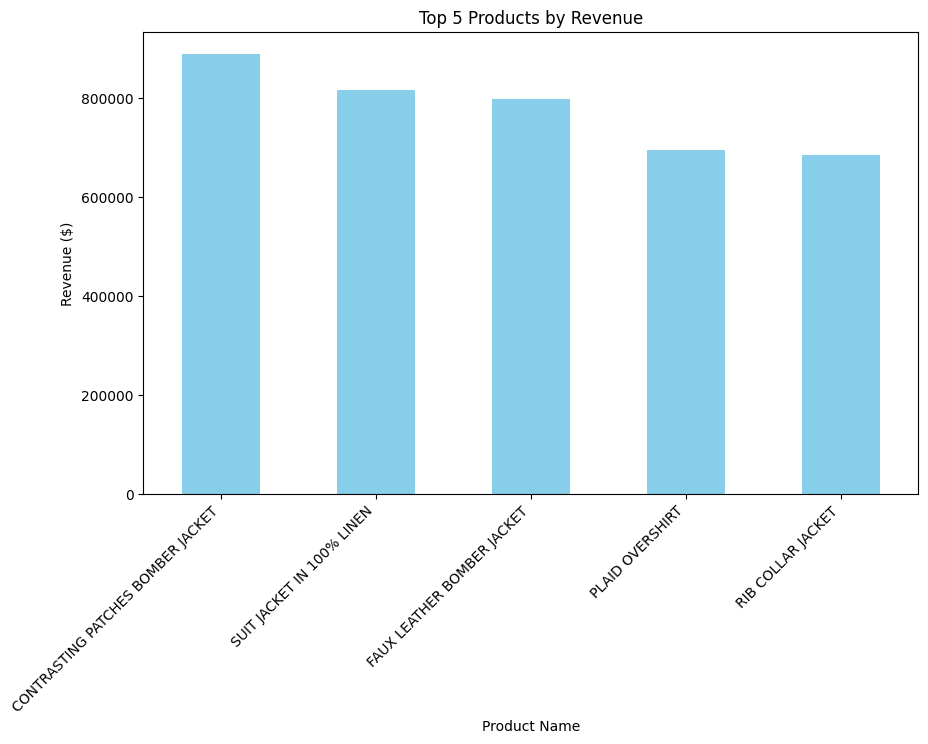


📦 Revenue by Category:
Product_Category
Clothing    38988476.48
Name: Revenue, dtype: float64


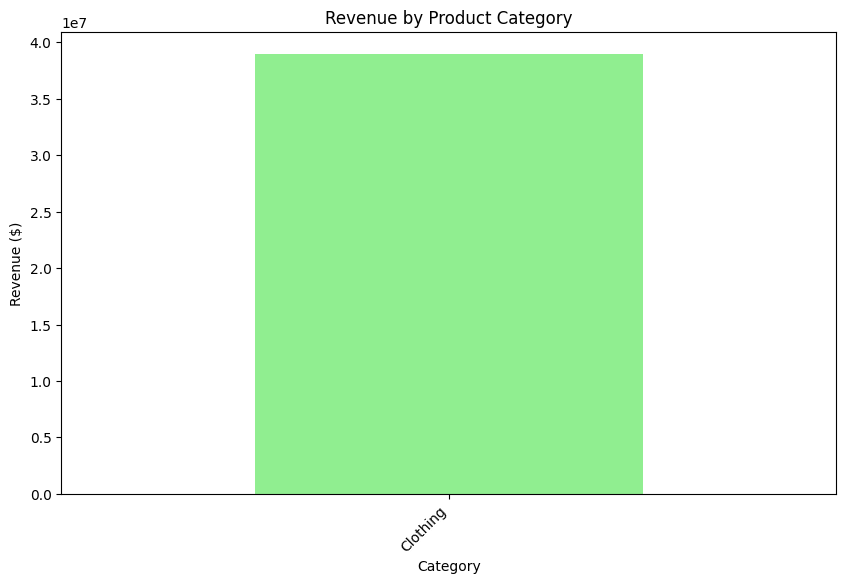


🌦️ Revenue by Season:
Seasonal
Yes    19832088.66
No     19156387.82
Name: Revenue, dtype: float64


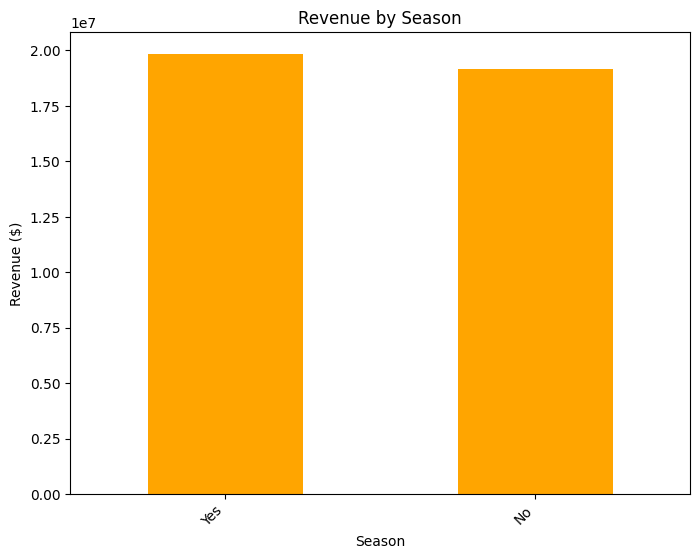


👕 Revenue by Section:
section
MAN      35712663.03
WOMAN     3275813.45
Name: Revenue, dtype: float64


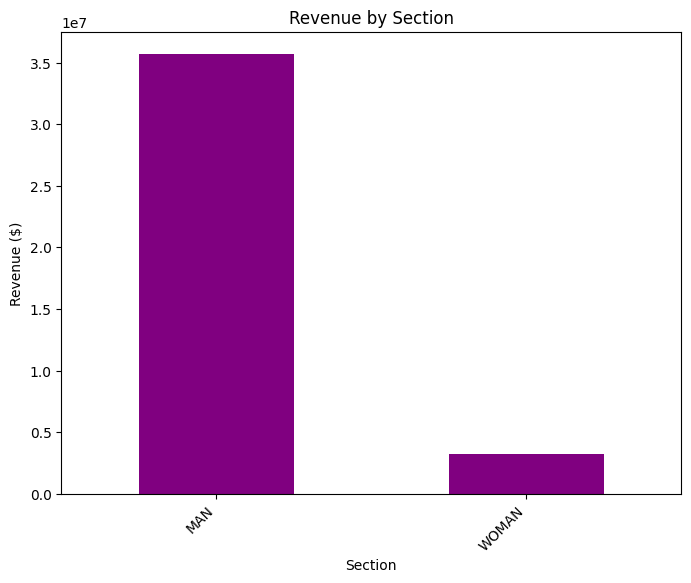

In [2]:
# -------------------------------
# Step 1: Import Libraries
# -------------------------------
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------
# Step 2: Load Dataset
# -------------------------------
file_path = "/content/Zara_Sales_Analysis - Cleaned.csv"
df = pd.read_csv(file_path)

# Quick overview
print("Shape of dataset:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum())

# -------------------------------
# Step 3: Data Cleaning
# -------------------------------

# Clean 'price' column (remove currency symbols, commas, etc.)
df['price'] = df['price'].astype(str).str.replace(r'[^\d.]', '', regex=True)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Drop rows with missing or invalid prices
df = df.dropna(subset=['price'])

# -------------------------------
# Step 4: Feature Engineering
# -------------------------------

# Create Revenue column
df['Revenue'] = df['price'] * df['Sales_Volume']

# -------------------------------
# Step 5: Basic KPIs
# -------------------------------

total_revenue = df['Revenue'].sum()
total_sales_volume = df['Sales_Volume'].sum()
avg_price = df['price'].mean()

print("\n📊 Key Metrics:")
print("Total Revenue: ${:,.2f}".format(total_revenue))
print("Total Sales Volume:", total_sales_volume)
print("Average Price: ${:,.2f}".format(avg_price))

# -------------------------------
# Step 6: Top 5 Products by Revenue
# -------------------------------

top_products = (
    df.groupby('name', dropna=False)['Revenue']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

print("\n🏆 Top 5 Products by Revenue:")
print(top_products)

plt.figure(figsize=(10,6))
top_products.plot(kind='bar', color='skyblue')
plt.title("Top 5 Products by Revenue")
plt.ylabel("Revenue ($)")
plt.xlabel("Product Name")
plt.xticks(rotation=45, ha='right')
plt.show()

# -------------------------------
# Step 7: Revenue by Category
# -------------------------------

revenue_by_category = df.groupby('Product_Category')['Revenue'].sum().sort_values(ascending=False)

print("\n📦 Revenue by Category:")
print(revenue_by_category)

plt.figure(figsize=(10,6))
revenue_by_category.plot(kind='bar', color='lightgreen')
plt.title("Revenue by Product Category")
plt.ylabel("Revenue ($)")
plt.xlabel("Category")
plt.xticks(rotation=45, ha='right')
plt.show()

# -------------------------------
# Step 8: Revenue by Season
# -------------------------------

revenue_by_season = df.groupby('Seasonal')['Revenue'].sum().sort_values(ascending=False)

print("\n🌦️ Revenue by Season:")
print(revenue_by_season)

plt.figure(figsize=(8,6))
revenue_by_season.plot(kind='bar', color='orange')
plt.title("Revenue by Season")
plt.ylabel("Revenue ($)")
plt.xlabel("Season")
plt.xticks(rotation=45, ha='right')
plt.show()

# -------------------------------
# Step 9: Revenue by Section (Men/Women/Kids)
# -------------------------------

revenue_by_section = df.groupby('section')['Revenue'].sum().sort_values(ascending=False)

print("\n👕 Revenue by Section:")
print(revenue_by_section)

plt.figure(figsize=(8,6))
revenue_by_section.plot(kind='bar', color='purple')
plt.title("Revenue by Section")
plt.ylabel("Revenue ($)")
plt.xlabel("Section")
plt.xticks(rotation=45, ha='right')
plt.show()
